   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

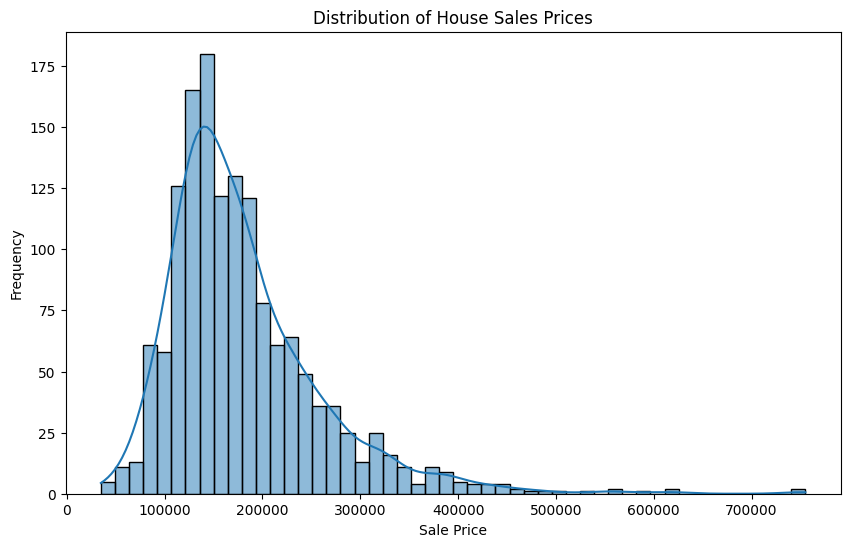

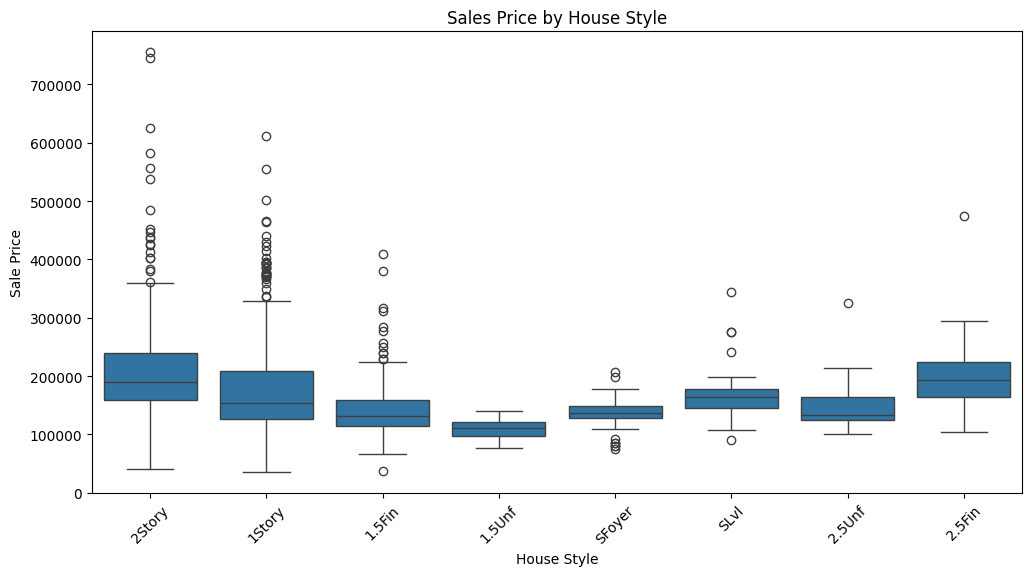

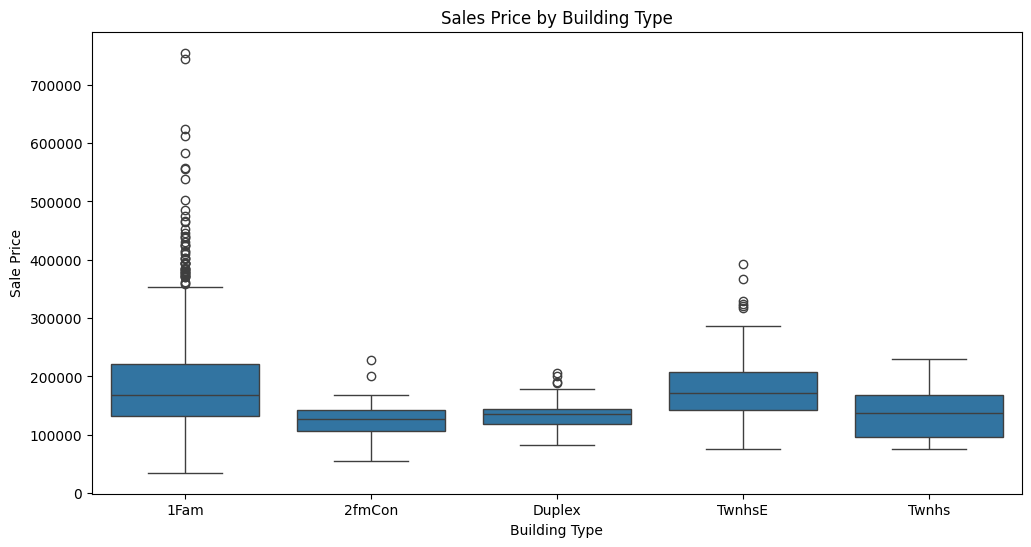

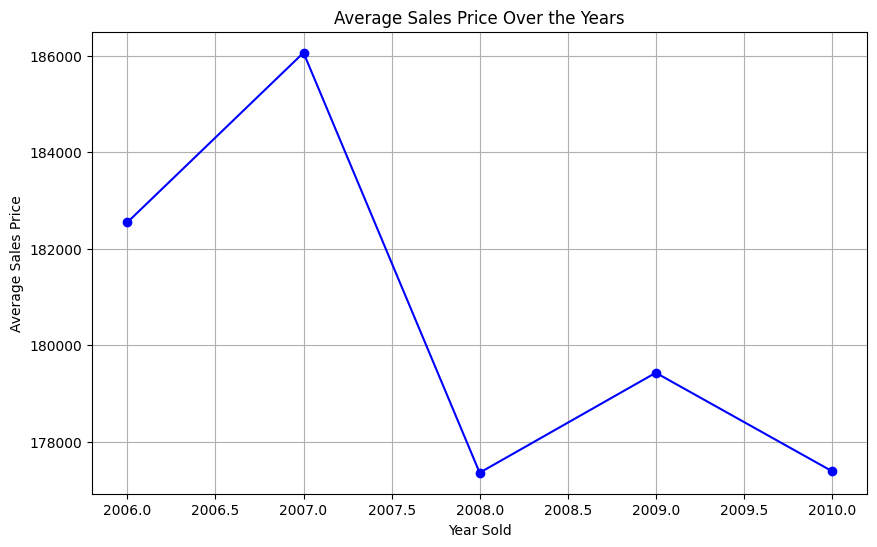

In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv("Assessment-3-Datasets/DMVA3DT1-HouseSales.csv")

# Explore the first few rows to understand the data structure
print(df.head())

# Select relevant columns for visualizations
columns_to_explore = ['SalePrice', 'HouseStyle', 'BldgType', 'YrSold']
df = df[columns_to_explore].dropna()

# 1. Distribution of House Sales Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], bins=50, kde=True)
plt.title("Distribution of House Sales Prices")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()

# 2. Sales Price by House Style
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='HouseStyle', y='SalePrice')
plt.title("Sales Price by House Style")
plt.xlabel("House Style")
plt.ylabel("Sale Price")
plt.xticks(rotation=45)
plt.show()

# 3. Sales Price by Building Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='BldgType', y='SalePrice')
plt.title("Sales Price by Building Type")
plt.xlabel("Building Type")
plt.ylabel("Sale Price")
plt.show()

# 4. Sales Price Trend Over the Years
plt.figure(figsize=(10, 6))
avg_price_per_year = df.groupby('YrSold')['SalePrice'].mean()
plt.plot(avg_price_per_year.index, avg_price_per_year.values, marker='o', linestyle='-', color='b')
plt.title("Average Sales Price Over the Years")
plt.xlabel("Year Sold")
plt.ylabel("Average Sales Price")
plt.grid(True)
plt.show()



C:\Users\maxpr\anaconda3\envs\GPU\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\maxpr\anaconda3\envs\GPU\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\maxpr\anaconda3\envs\GPU\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\maxpr\anaconda3\envs\GPU\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is k

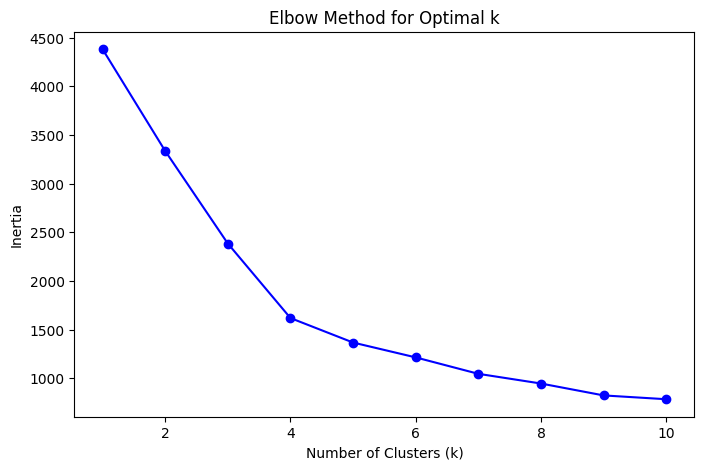

C:\Users\maxpr\anaconda3\envs\GPU\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


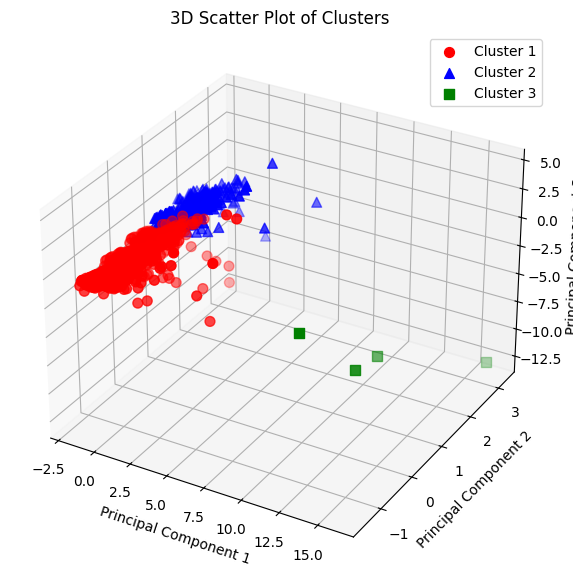

In [8]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the CSV file
df = pd.read_csv("Assessment-3-Datasets/DMVA3DT1-HouseSales.csv")

# Select features for clustering (replace with actual feature names as needed)
features = ['LotArea', 'YrSold', 'SalePrice'] 
X = df[features].dropna()

# Standardize the features for optimal clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimensionality for better visualization
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Determine the optimal number of clusters using the elbow method
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve to find the optimal number of clusters
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

# Set the number of clusters
optimal_k = 3  

# Fit KMeans with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Add cluster labels to the data
df['Cluster'] = clusters

# Plot the 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Use different colors and markers for each cluster
colors = ['red', 'blue', 'green']
markers = ['o', '^', 's']

for i in range(optimal_k):
    cluster_data = X_pca[clusters == i]
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2], 
               color=colors[i], marker=markers[i], s=50, label=f'Cluster {i + 1}')

# Label the axes
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
plt.title("3D Scatter Plot of Clusters")
plt.legend()
plt.show()

In [7]:
print(df.columns)

Index(['SalePrice', 'HouseStyle', 'BldgType', 'YrSold'], dtype='object')
